This script contains the following:
1. Importing your libraries and data

2. Subsetting, wrangling, and cleaning time-series data

3. Time-series analysis: decomposition

4. Test or Stationarity

5. Stationarizing


1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
path= r'C:\Users\nehma\OneDrive\Desktop\CF Project'

In [3]:
path

'C:\\Users\\nehma\\OneDrive\\Desktop\\CF Project'

In [4]:
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'merge_all_years.csv')) 

In [23]:
# Configure API key 

quandl.ApiConfig.api_key = 'xGxhZ8V7kUwpAX8uGSP1'

In [24]:
# Importing the Federal Reserve Economic Data "Federal Debt: Total Public Debt" variable.

data = quandl.get('FRED/GFDEBTN')

In [25]:
data.head(5)

,Value
Date,
1966-01-01,320999.0
1966-04-01,316097.0
1966-07-01,324748.0
1966-10-01,329319.0
1967-01-01,330947.0


#checking dataset

In [5]:
df.head()

,Unnamed: 0,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,Dystopia_residual
0,0,Afghanistan,Southern Asia,2015,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
1,1,Albania,Central and Eastern Europe,2015,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
2,2,Algeria,Middle East and Northern Africa,2015,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
3,3,Angola,Sub-Saharan Africa,2015,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
4,4,Argentina,Latin America and Caribbean,2015,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600


In [6]:
# Dropping columns 
df = df.drop(['Unnamed: 0'], axis=1, errors='ignore')

In [7]:
df.head()

,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,Dystopia_residual
0,Afghanistan,Southern Asia,2015,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
1,Albania,Central and Eastern Europe,2015,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
2,Algeria,Middle East and Northern Africa,2015,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
3,Angola,Sub-Saharan Africa,2015,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
4,Argentina,Latin America and Caribbean,2015,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600


In [8]:
df.shape

(782, 12)

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.columns

Index(['Country', 'Region', 'Year', 'Happiness_rank', 'Happiness_score',
       'GDP_capita', 'Family', 'Life_expectancy', 'Freedom', 'Gov_trust',
       'Generosity', 'Dystopia_residual'],
      dtype='object')

In [26]:
# Reset index to use data as filter 

data_2 = data.reset_index()

In [27]:
data_2.head()

,Date,Value
0,1966-01-01,320999.0
1,1966-04-01,316097.0
2,1966-07-01,324748.0
3,1966-10-01,329319.0
4,1967-01-01,330947.0


In [28]:
data_2.shape

(224, 2)

In [29]:
data_sub = data_2.loc[(data_2['Date'] >= '2015-01-01') & (data_2['Date'] < '2019-12-01')]

In [30]:
data_sub.shape

(20, 2)

In [31]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
2015-01-01,18152056.0
2015-04-01,18151998.0
2015-07-01,18150618.0
2015-10-01,18922179.0
2016-01-01,19264939.0


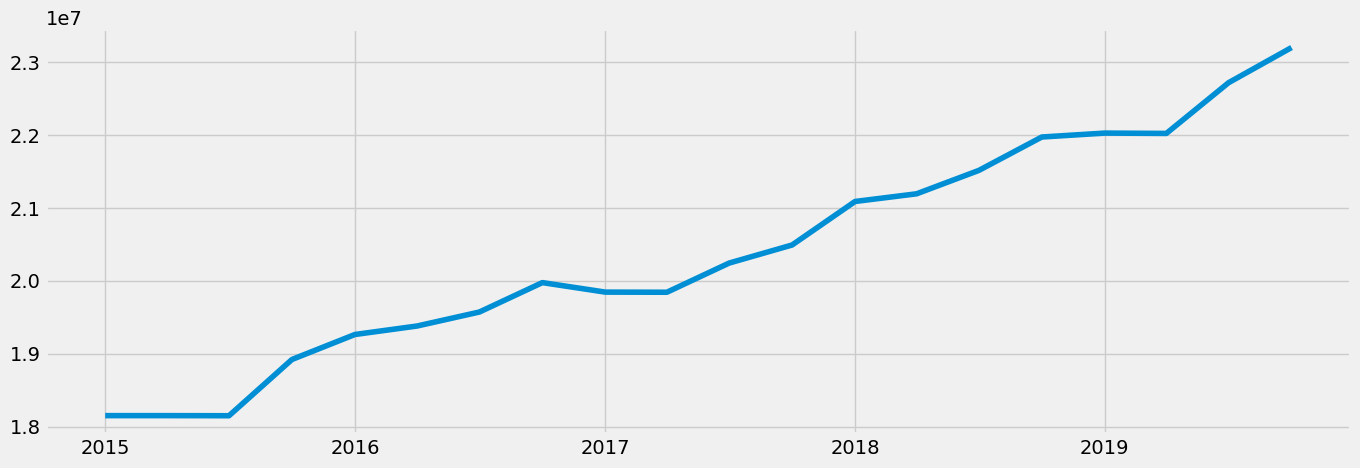

In [32]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [33]:
# Checking for missing values

data_sub.isnull().sum() 

Value    0
dtype: int64

In [34]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

0

3.Time-series analysis: decomposition

In [39]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive') 



In [40]:
# Defining a fixed size for visualizations
from pylab import rcParams

rcParams['figure.figsize'] = 18, 7

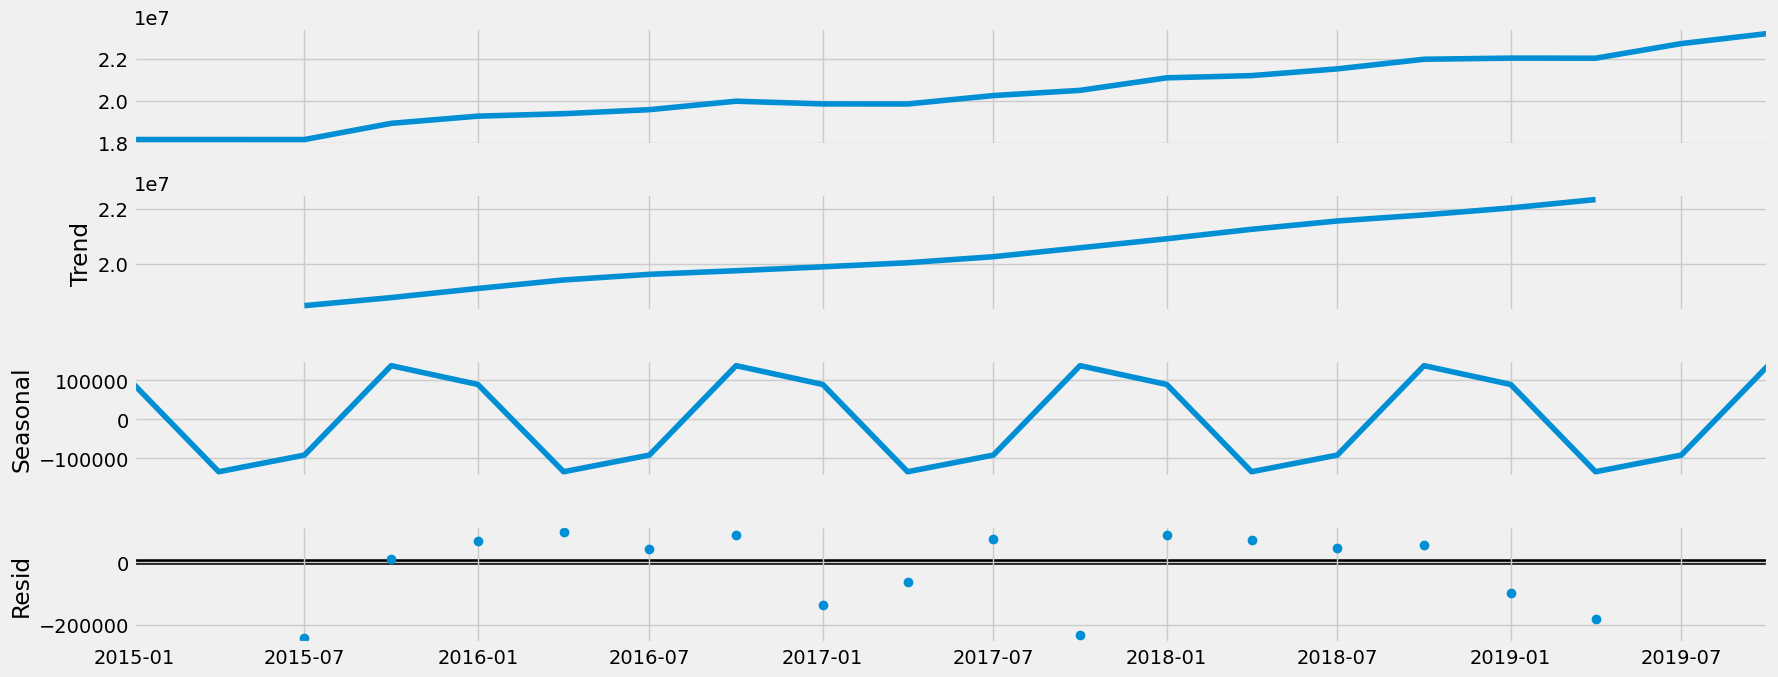

In [41]:
# Plotting the separate components

decomposition.plot()
plt.show()

This shows a clear upward trend in GDP. The level and the trend are very similar, but the level shows a longer amount of time in the data. The seasonality shows a clear drop in  GDP during the first half of the year and a steady increase towards the end of the year. The residuals don't seem to follow a specific or obvious pattern.

4. Test for Stationarity

In [44]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  2.561316
p-value                         0.999067
Number of Lags Used             8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


Conclusion:Interpretation:

The test statistic value is 2.561316, and the p-value is 0.999067. The number of lags used in the test is 8, and the number of observations used is 11. The critical values at the 1%, 5%, and 10% significance levels are -4.223238, -3.189369, and -2.729839, respectively. The high p-value suggests that we fail to reject the null hypothesis of non-stationarity. The test statistic being greater than the critical values further supports the non-stationary nature of the data.

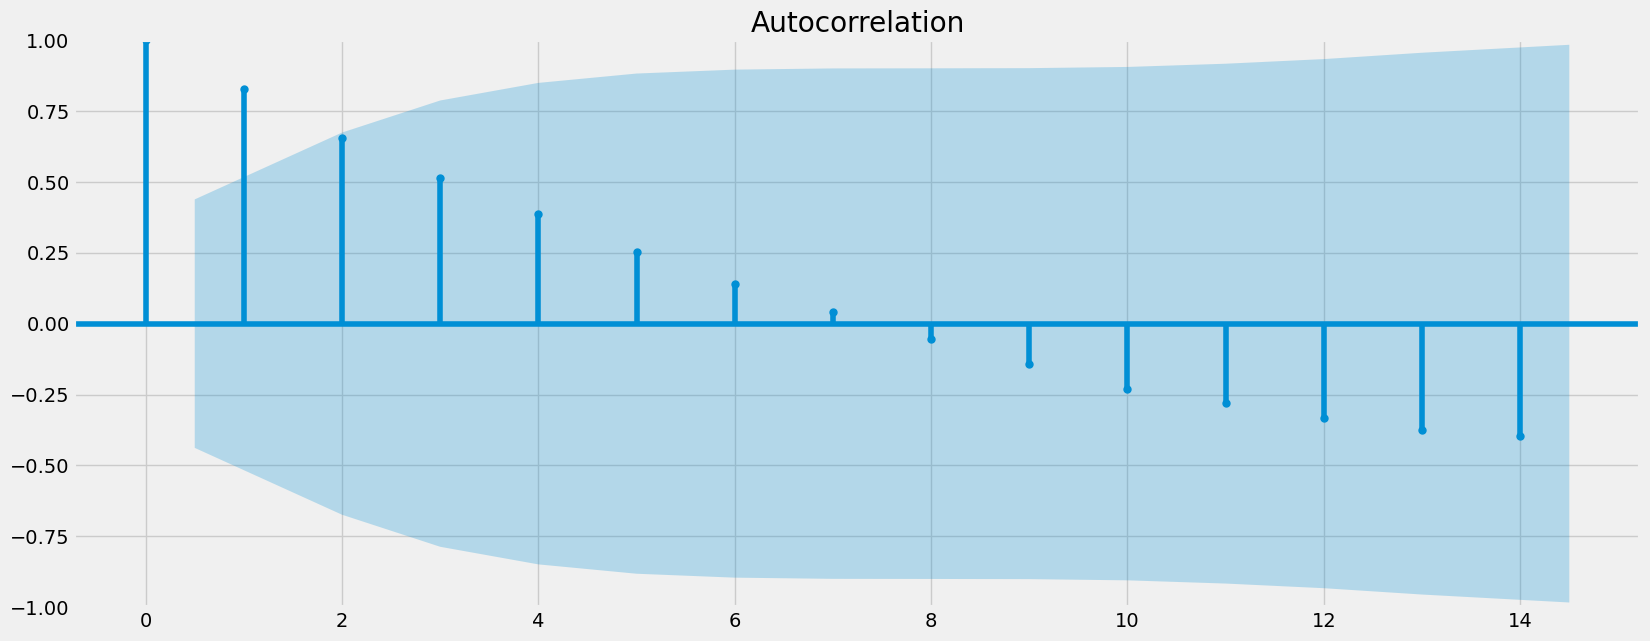

In [45]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

The vertical lines represent the lags in the series, while the blue area represents the confidence interval. When lines go above the blue edge of the confidence interval, this means the lags are significantly correlated with each other. We have a few lags beyond this interval, and can deduce that this data is non-stationary.

5.Stationarizing 

In [46]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)


In [47]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing.
# You need to remove these or you won't be able to run the Dickey-Fuller test.
data_diff.head()

,Value
datetime,
2015-04-01,-58.0
2015-07-01,-1380.0
2015-10-01,771561.0
2016-01-01,342760.0
2016-04-01,116652.0


In [49]:
data_diff.columns

Index(['Value'], dtype='object')

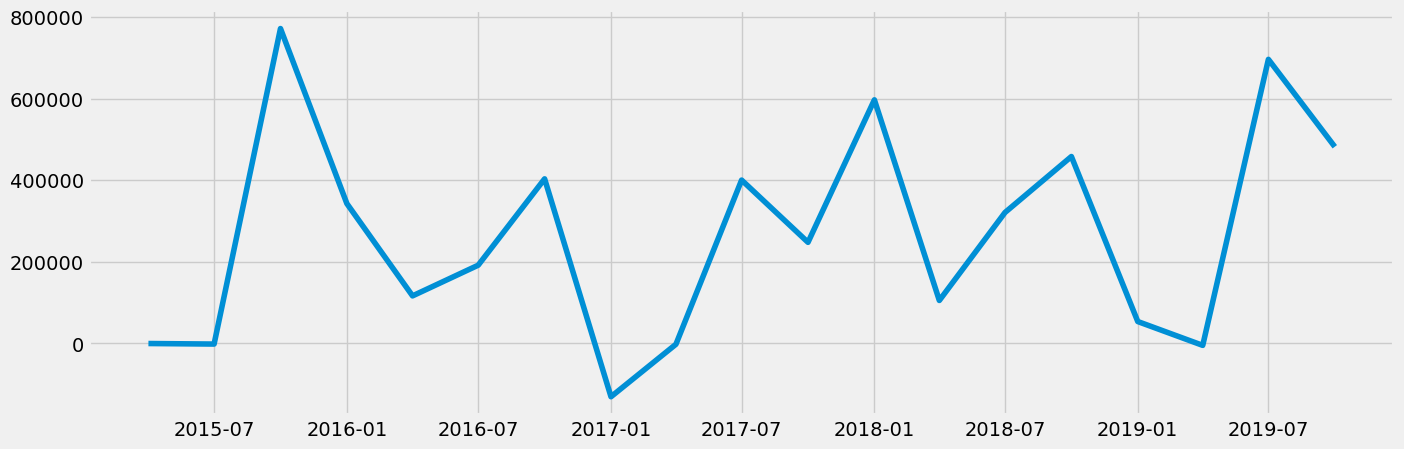

In [50]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [51]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.875098
p-value                         0.000039
Number of Lags Used             1.000000
Number of Observations Used    17.000000
Critical Value (1%)            -3.889266
Critical Value (5%)            -3.054358
Critical Value (10%)           -2.666984
dtype: float64


Observations:

The test statistic value of -4.875098 is lower than the critical values at the 1%, 5%, and 10% significance levels (-3.889266, -3.054358, -2.666984), and the extremely low p-value of 0.000039 suggests strong evidence against the null hypothesis of non-stationarity.

Comparison:

While the first time series appears non-stationary, as suggested by a high p-value and test statistic exceeding critical values, the second time series provides strong evidence of stationarity, supported by a low p-value and a test statistic below critical values.

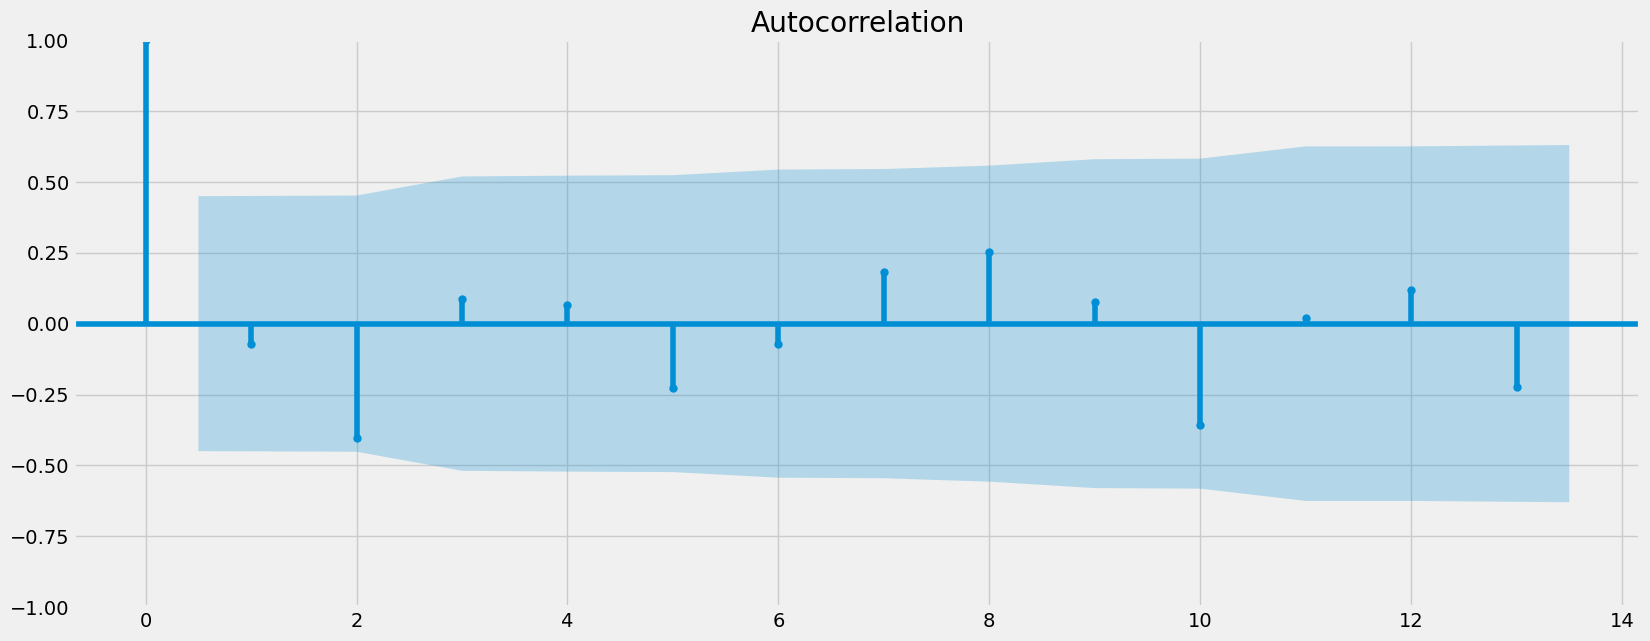

In [52]:
plot_acf(data_diff)
plt.show()

The autocorrelation plot has improved.